[2024-12-13 Fiddler](https://thefiddler.substack.com/p/can-you-survive-the-floor)
====================

Fiddler
-------
I think it's clear that a corner has the best chance of avoiding eliminations, maximizing the
probability of winning.

In the first round, a corner has $1/9 + 2/9 \cdot 1/3$ chance of facing elimination, while
a side has $1/9 + 2/9 \cdot 1/2 + 1/9 \cdot 1/4$ and the middle has $1/9 + 4/9 \cdot 1/3$.

Calculating the win probabilities confirms that the corner has the best chance of winning.

Extra credit
------------
The only relevant parameter for each round is the contestant graph.  The exact topology is
irrelevant after the initial contestant graph is determined.  After an elimination, the loser's
neighbors become the winner's neighbors.

In [1]:
from functools import cache

@cache
def win_probabilities(g):
    if g.order() == 1:
        return {g.vertices()[0]:1}
    result = dict.fromkeys(g.vertices(), 0)
    for a in g.vertices():
        for b in g.vertices():
            if a >= b or not g.has_edge(a, b):
                continue
            matchup_probability = (1/len(g[a]) + 1/len(g[b]))/g.order()
            new_graph = g.copy(immutable=false)
            new_graph.merge_vertices((a,b))
            new_graph_canonical = new_graph.canonical_label()
            new_graph_canonical.name(new='')
            mapping = new_graph_canonical.is_isomorphic(new_graph,certificate=true)[1]
            wp = win_probabilities(new_graph_canonical.copy(immutable=true))
            for (k,v) in wp.items():
                n = mapping[k]
                if n == a:
                    result[a] += 1/2*matchup_probability*v
                    result[b] += 1/2*matchup_probability*v
                else:
                    result[n] += matchup_probability*v
    return result

In [2]:
rows = [['Start position','Win probability','']]
for (k,v) in win_probabilities(graphs.GridGraph((3,3)).copy(immutable=true)).items():
    rows.append([f"{k[0]},{k[1]}",f"{v}",f"{numerical_approx(v)}"])
table(rows=rows,header_row=true)

Start position,Win probability,
"0,0",95802636437/743178240000,0.128909366933294
"0,1",8977833162901/90296156160000,0.0994265264956878
"0,2",95802636437/743178240000,0.128909366933294
"1,0",8977833162901/90296156160000,0.0994265264956878
"1,1",3912371100007/45148078080000,0.0866564262840710
"1,2",8977833162901/90296156160000,0.0994265264956878
"2,0",95802636437/743178240000,0.128909366933294
"2,1",8977833162901/90296156160000,0.0994265264956878
"2,2",95802636437/743178240000,0.128909366933294


Running [simulations](20241213.go) agree:

    $ go run 20241213.go
    3×3:
    0,0: 0.129202
    0,1: 0.099212
    0,2: 0.129183
    1,0: 0.100070
    1,1: 0.086032
    1,2: 0.099874
    2,0: 0.128740
    2,1: 0.098840
    2,2: 0.128846
    4×3:
    0,0: 0.101001
    0,1: 0.078030
    0,2: 0.101001
    1,0: 0.076453
    1,1: 0.066771
    1,2: 0.076876
    2,0: 0.076886
    2,1: 0.065726
    2,2: 0.076880
    3,0: 0.101034
    3,1: 0.078033
    3,2: 0.101309
    4×4:
    0,0: 0.078724
    0,1: 0.059921
    0,2: 0.059669
    0,3: 0.079010
    1,0: 0.059798
    1,1: 0.051070
    1,2: 0.051149
    1,3: 0.060249
    2,0: 0.060000
    2,1: 0.051360
    2,2: 0.051285
    2,3: 0.059996
    3,0: 0.078686
    3,1: 0.059806
    3,2: 0.060181
    3,3: 0.079096

Thoughts on extra extra credit
==============================

I'm not expecting to figure it out.

My code is too slow for even a 4×4 grid.  Trying with a 4×3 grid, it's reasonably quick, though not
instant.

In [3]:
for (k,v) in win_probabilities(graphs.GridGraph((4,3)).copy(immutable=true)).items():
    print(k,':',v,',',numerical_approx(v))

(0, 0) : 5721481056759142944840871/56515950945333411840000000 , 0.101236570579754
(0, 1) : 98359922199711757608377/1261516762172620800000000 , 0.0779695721444981
(0, 2) : 5721481056759142944840871/56515950945333411840000000 , 0.101236570579754
(1, 0) : 2704599055027132736287979/35322469340833382400000000 , 0.0765687989967499
(1, 1) : 853129970116933757577599/12844534305757593600000000 , 0.0664196887024947
(1, 2) : 2704599055027132736287979/35322469340833382400000000 , 0.0765687989967499
(2, 0) : 2704599055027132736287979/35322469340833382400000000 , 0.0765687989967499
(2, 1) : 853129970116933757577599/12844534305757593600000000 , 0.0664196887024947
(2, 2) : 2704599055027132736287979/35322469340833382400000000 , 0.0765687989967499
(3, 0) : 5721481056759142944840871/56515950945333411840000000 , 0.101236570579754
(3, 1) : 98359922199711757608377/1261516762172620800000000 , 0.0779695721444981
(3, 2) : 5721481056759142944840871/56515950945333411840000000 , 0.101236570579754


Due to symmetries, the number of distinct starting positions
for an $N\times N$ grid is

In [4]:
k = var('k')
distinct_starts(N) = sum(k,k,1,ceil(N/2))
print([(i,distinct_starts(i)) for i in [1..10]])
distinct_starts

[(1, 1), (2, 1), (3, 3), (4, 3), (5, 6), (6, 6), (7, 10), (8, 10), (9, 15), (10, 15)]


N |--> 1/2*ceil(1/2*N)^2 + 1/2*ceil(1/2*N)

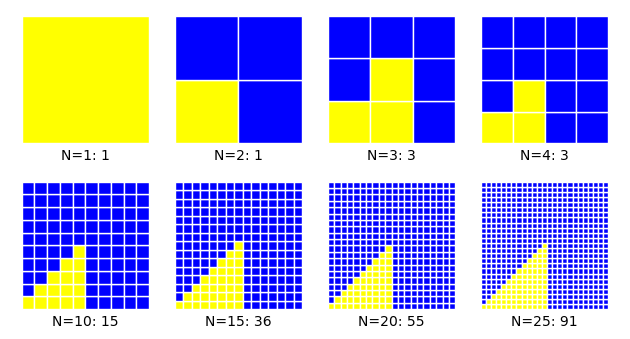

In [5]:
def p(n, xoff, yoff):
    return (text(f"N={n}: {distinct_starts(n)}",(xoff+1/2,yoff-0.1),color='black',axes=false) +
        sum([(polygon([(xoff+i/n,yoff+j/n),(xoff+(i+1)/n,yoff+j/n),
                       (xoff+(i+1)/n,yoff+(j+1)/n),(xoff+i/n,yoff+(j+1)/n)],
                      edgecolor='white',color='yellow' if i < n/2 and j <= i else 'blue'))
            for i in range(n) for j in range(n)]))

sum([p(n,n*1.2,0) for n in [1..4]]+[p(5+5*n,n*1.2,-1.3) for n in [1..4]])

Given a graph for round $n$, there are $2^n-1$ ways to add a node, not all of which are possible
precursor graphs, and not all of which are topologically distinct.  For example, a node that
connects to just two nodes that are not connected to each other will make a graph that cannot be
a precursor, since the new node was the loser, and the winner will not be connected to the other
node the loser was connected to.

There is one possible graph in the last round:

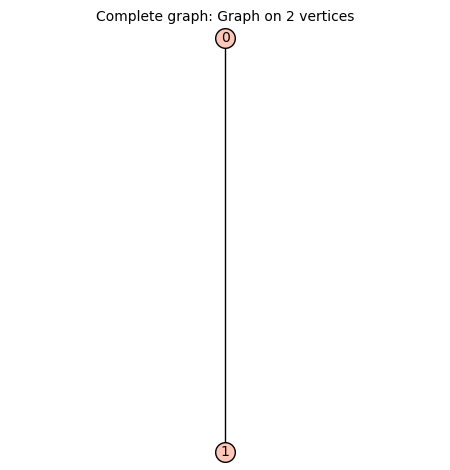

In [6]:
graphs.CompleteGraph(2)

There are two distinct graphs for the second to last round:

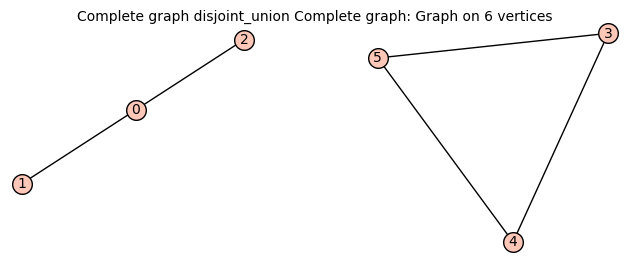

In [7]:
g = graphs.CompleteGraph(3)
g.delete_edge(1,2)
g + graphs.CompleteGraph(3)

The initial graphs are always a grid:

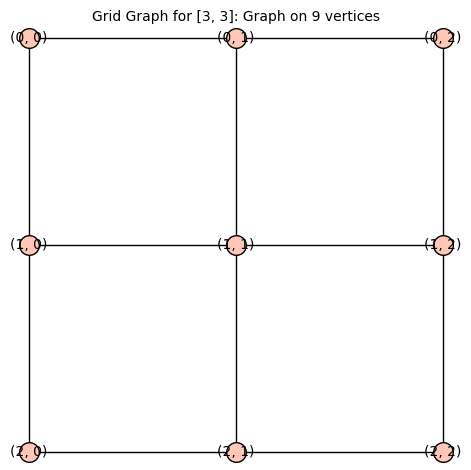

In [8]:
graphs.GridGraph((3,3))

Looking at the number of distinct possible graphs for each round,

In [9]:
def one_round(g):
    if g.order() == 1:
        return set()
    result = set()
    for a in g.vertices():
        for b in g.vertices():
            if a >= b or not g.has_edge(a, b):
                continue
            new_graph = g.copy(immutable=false)
            new_graph.merge_vertices((a,b))
            new_graph_canonical = new_graph.canonical_label()
            new_graph_canonical.name(new='')
            result.add(new_graph_canonical.copy(immutable=true))
    return result

def distinct_graphs(nx,ny):
    s = {graphs.GridGraph((nx,ny)).copy(immutable=true)}
    for i in [2..nx*ny-1]:
        acc = set()
        for g in s:
            acc = acc | one_round(g)
        s = acc
        print(f"Round {i}: {len(s)} distinct graphs")

For 3×3,

In [10]:
distinct_graphs(3,3)

Round 2: 2 distinct graphs
Round 3: 7 distinct graphs
Round 4: 10 distinct graphs
Round 5: 10 distinct graphs
Round 6: 5 distinct graphs
Round 7: 2 distinct graphs
Round 8: 1 distinct graphs


For 4×3,

In [11]:
distinct_graphs(4,3)

Round 2: 5 distinct graphs
Round 3: 26 distinct graphs
Round 4: 77 distinct graphs
Round 5: 132 distinct graphs
Round 6: 114 distinct graphs
Round 7: 59 distinct graphs
Round 8: 18 distinct graphs
Round 9: 6 distinct graphs
Round 10: 2 distinct graphs
Round 11: 1 distinct graphs


For 4×4, we can see why the win probability calculation is so slow.

In [12]:
distinct_graphs(4,4)

Round 2: 4 distinct graphs
Round 3: 32 distinct graphs
Round 4: 157 distinct graphs
Round 5: 588 distinct graphs
Round 6: 1405 distinct graphs
Round 7: 2171 distinct graphs
Round 8: 1987 distinct graphs
Round 9: 1125 distinct graphs
Round 10: 367 distinct graphs
Round 11: 84 distinct graphs
Round 12: 18 distinct graphs
Round 13: 6 distinct graphs
Round 14: 2 distinct graphs
Round 15: 1 distinct graphs
